# Modelos de Clasificación 

In [1]:
import pandas as pd
import numpy as np
import warnings

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

# Modelo de Predicción de Supervivientes en Titanic. 

Implemente un modelo de Regresión Logistica y de KNN utilizando para predecir los sobrvivientes del Titanic, calculando su métrica de performance por defecto utilizando `.score()`

* Para ello utilice como variables predictoras `Pclass`, `Sex`, `Age`, `Parch`, `Fare` y `Embarked`.
* Utilice un Encoder apropiado y escale las variables. 
* Repita el proceso utilizando la arquitectura de Pipelines.

In [2]:
df = pd.read_csv('titanic.csv', index_col = 0)
df[['Pclass', 'Sex','Embarked']] = df[['Pclass', 'Sex','Embarked']].astype('category')
df['Age'] = df.Age.fillna(df.Age.mean())
df.dtypes

Survived           int64
Pclass          category
Name              object
Sex             category
Age              float64
SibSp              int64
Parch              int64
Ticket            object
Fare             float64
Cabin             object
Embarked        category
Signing_date      object
dtype: object

## Data Split 

In [3]:
X = df[['Pclass', 'Sex','Age','Parch','Fare','Embarked']]
y = df.Survived

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)


### Procedimiento Manual

In [4]:
from category_encoders import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [5]:
ohe = OneHotEncoder(use_cat_names = True)
X_train_enc = ohe.fit_transform(X_train)
X_test_enc = ohe.transform(X_test)

sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train_enc)
X_test_sc = sc.transform(X_test_enc)

lr = LogisticRegression(random_state = 123)
lr.fit(X_train_sc, y_train)
y_pred = lr.predict(X_test_sc)
y_pred_train = lr.predict(X_test_sc)

print('Score Train:', lr.score(X_train_sc, y_train))
print('Score Test:', lr.score(X_test_sc, y_test))

Score Train: 0.8009630818619583
Score Test: 0.7985074626865671


In [6]:
lr.coef_

array([[ 0.54278657,  0.04431156, -0.50009649,  0.61162619, -0.61162619,
        -0.51833143, -0.11971738,  0.02391211, -0.09052823, -0.06706711,
        -0.29757533]])

In [7]:
lr.intercept_

array([-0.59164908])

### Procedimiento utilizando Pipelines

#### LR + OHE + SC 

In [8]:
from sklearn.pipeline import Pipeline

pipe = Pipeline(steps = [
    ('ohe', OneHotEncoder()),
    ('sc', StandardScaler()),
    ('lr', LogisticRegression(random_state = 123))
])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
y_pred_train = pipe.predict(X_train)

print('Score Train:', pipe.score(X_train, y_train))
print('Score Test:', pipe.score(X_test, y_test))

Score Train: 0.8009630818619583
Score Test: 0.7985074626865671


#### KNN + OHE + SC 

In [9]:
pipe = Pipeline(steps = [
    ('ohe', OneHotEncoder()),
    ('sc', StandardScaler()),
    ('lr', KNeighborsClassifier())
])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
y_pred_train = pipe.predict(X_train)
y_proba = pipe.predict_proba(X_test)

print('Score Train:', pipe.score(X_train, y_train))
print('Score Test:', pipe.score(X_test, y_test))

Score Train: 0.8491171749598716
Score Test: 0.8059701492537313


## Métricas de Clasificación

In [10]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scikitplot.metrics import plot_confusion_matrix, plot_roc, plot_cumulative_gain, plot_precision_recall, plot_lift_curve

### Confusion Matrix 

In [11]:
confusion_matrix(y_test, y_pred)

array([[146,  24],
       [ 28,  70]], dtype=int64)

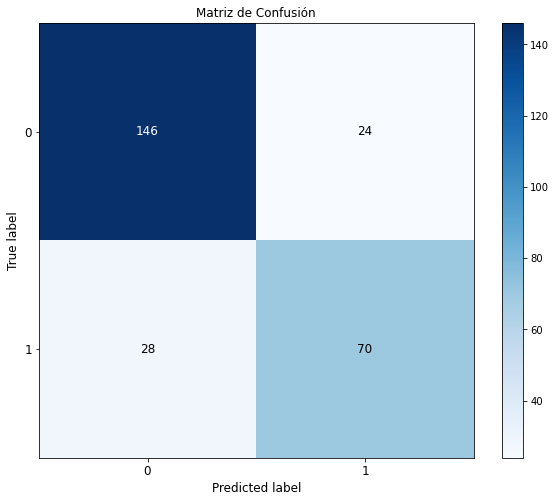

In [12]:
plot_confusion_matrix(y_test, y_pred, title = 'Matriz de Confusión',text_fontsize = 'large', title_fontsize = 'large', figsize = (10,8))
plt.show()

### Classification Report

In [13]:
print(classification_report(y_test, y_pred, digits = 4))

              precision    recall  f1-score   support

           0     0.8391    0.8588    0.8488       170
           1     0.7447    0.7143    0.7292        98

    accuracy                         0.8060       268
   macro avg     0.7919    0.7866    0.7890       268
weighted avg     0.8046    0.8060    0.8051       268



* Macro: Promedio
* Weighted: Promedio Ponderado

In [14]:
(0.85+0.73)/2

0.79

In [15]:
(0.85*170+0.73*98)/(170+98)

0.8061194029850746

#### Cálculo manual

In [16]:
70/(70+24) # True dividido columna

0.7446808510638298

In [17]:
70/(70+28) # True dividido fila

0.7142857142857143

In [18]:
2*0.74*0.71/(0.74+0.71)

0.7246896551724138

In [19]:
precision_score(y_test, y_pred, pos_label = 1)

0.7446808510638298

In [20]:
precision_score(y_test, y_pred, pos_label = 0)

0.8390804597701149

In [21]:
recall_score(y_test, y_pred, pos_label = 0)

0.8588235294117647

In [22]:
recall_score(y_test, y_pred, pos_label = 1)

0.7142857142857143

In [23]:
f1_score(y_test, y_pred, pos_label = 0)

0.8488372093023254

In [24]:
f1_score(y_test, y_pred, pos_label = 1)

0.7291666666666666

### Precision-Recall 

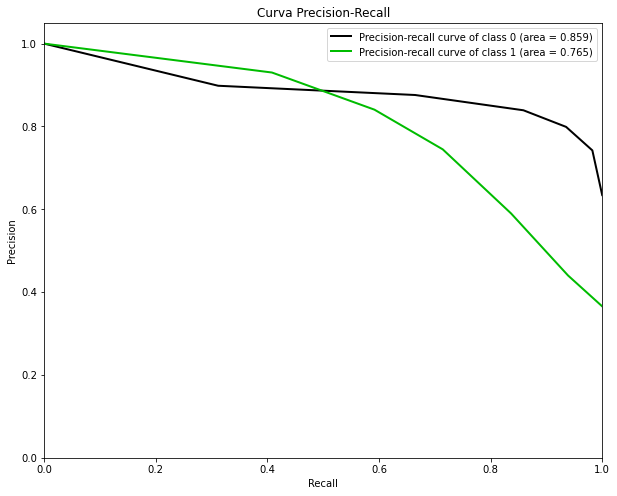

In [25]:
plot_precision_recall(y_test, y_proba, title = 'Curva Precision-Recall', plot_micro = False, classes_to_plot = [0,1], figsize = (10,8))
plt.show()

In [26]:
y.value_counts() #Debido a que Titanic es un dataset relativamente desbalanceado, podría ser una métrica más honesta

0    549
1    342
Name: Survived, dtype: int64

### Curva ROC 

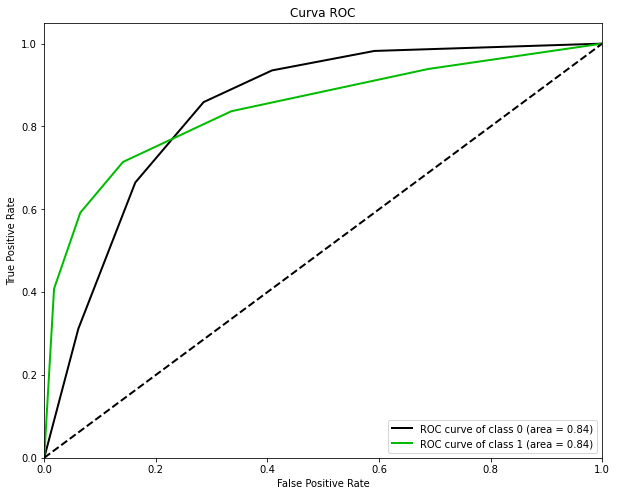

In [27]:
plot_roc(y_test, y_proba, plot_micro = False, plot_macro = False, title = 'Curva ROC', figsize = (10,8))
plt.show()

### Curva de Ganancia 

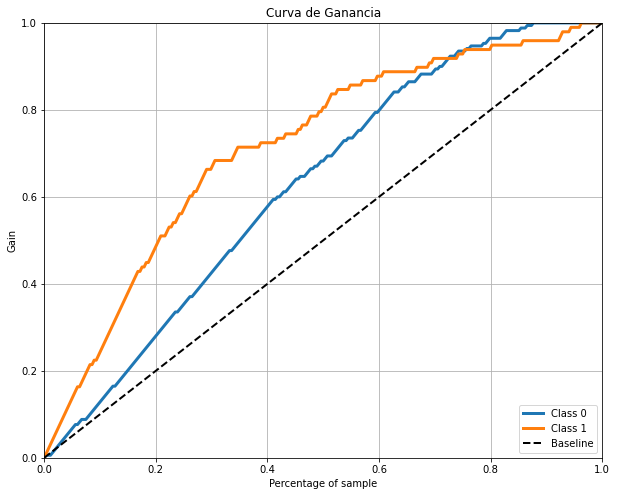

In [28]:
plot_cumulative_gain(y_test, y_proba, title = 'Curva de Ganancia', figsize = (10,8))
plt.show()

### Curva de Lift 

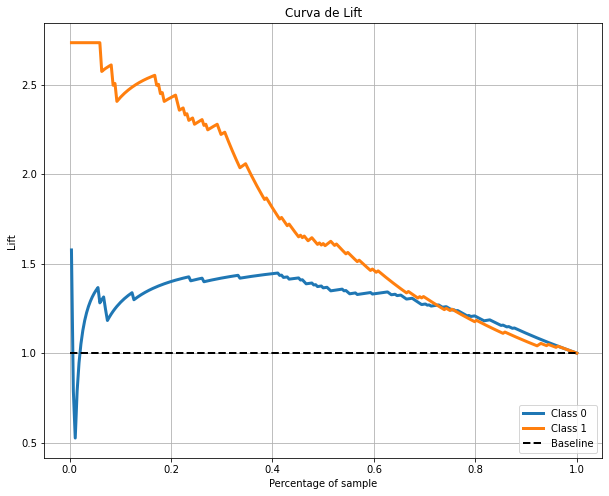

In [29]:
plot_lift_curve(y_test, y_proba, title = 'Curva de Lift', figsize = (10,8))
plt.show()

In [30]:
from sklearn.metrics import log_loss
log_loss(y_test, y_pred)

6.701625234603284